In [91]:
import pandas as pd
import requests
import datetime

In [92]:
gas_price_data = "Gas Price from 2000.csv"
gas_price_df = pd.read_csv(gas_price_data, header = 10)
new_index_df = gas_price_df.set_index('observation_date')
renamed_df = gas_price_df.rename(columns={"GASREGW":"Gas Price($)"})

<AxesSubplot:xlabel='observation_date'>

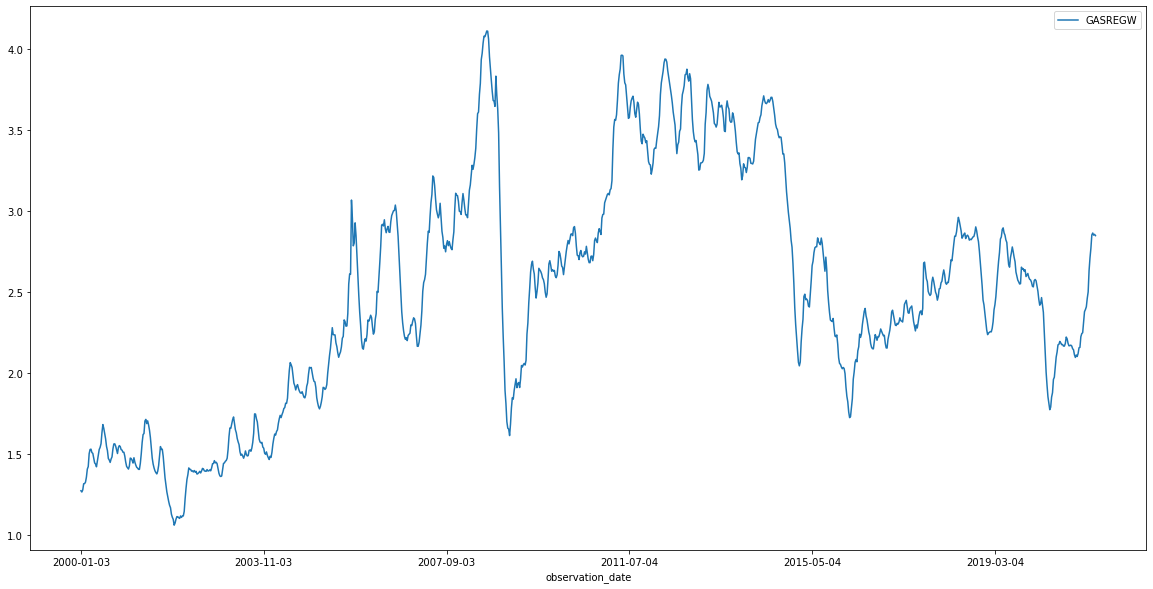

In [93]:
# Generaltrends of gas price from 2000 to 2021 
new_index_df.plot.line(figsize=(20, 10))

In [94]:
# Descriptive Statistics throughout the time 
renamed_df.describe()

,Gas Price($)
count,1111.000000
mean,2.486003
std,0.733902
min,1.059000
25%,1.919000
50%,2.471000
75%,2.944000
max,4.114000


In [95]:
# See the top 10 highest price 
renamed_df.nlargest(10, ["Gas Price($)"])

,observation_date,Gas Price($)
444,2008-07-07,4.114
445,2008-07-14,4.113
443,2008-06-30,4.095
441,2008-06-16,4.082
442,2008-06-23,4.079
446,2008-07-21,4.064
440,2008-06-09,4.039
439,2008-06-02,3.976
592,2011-05-09,3.965
591,2011-05-02,3.963


In [96]:
# Break down them into Year, Month, Day 
renamed_df['Year'] = pd.DatetimeIndex(renamed_df['observation_date']).year
renamed_df['Month'] = pd.DatetimeIndex(renamed_df['observation_date']).month
renamed_df['Day'] = pd.DatetimeIndex(renamed_df['observation_date']).day
renamed_df.head(10)

,observation_date,Gas Price($),Year,Month,Day
0,2000-01-03,1.272,2000,1,3
1,2000-01-10,1.264,2000,1,10
2,2000-01-17,1.277,2000,1,17
3,2000-01-24,1.315,2000,1,24
4,2000-01-31,1.316,2000,1,31
5,2000-02-07,1.325,2000,2,7
6,2000-02-14,1.356,2000,2,14
7,2000-02-21,1.406,2000,2,21
8,2000-02-28,1.421,2000,2,28
9,2000-03-06,1.501,2000,3,6


In [103]:
renamed_df['month_year'] = pd.to_datetime(renamed_df['observation_date']).dt.to_period('M')
renamed_df.head()

,observation_date,Gas Price($),Year,Month,Day,month_year
0,2000-01-03,1.272,2000,1,3,2000-01
1,2000-01-10,1.264,2000,1,10,2000-01
2,2000-01-17,1.277,2000,1,17,2000-01
3,2000-01-24,1.315,2000,1,24,2000-01
4,2000-01-31,1.316,2000,1,31,2000-01


In [97]:
# Select the data for 2001 
first_data = renamed_df.loc[renamed_df['Year']==2001]
first_data.head()

,observation_date,Gas Price($),Year,Month,Day
52,2001-01-01,1.406,2001,1,1
53,2001-01-08,1.425,2001,1,8
54,2001-01-15,1.474,2001,1,15
55,2001-01-22,1.471,2001,1,22
56,2001-01-29,1.460,2001,1,29


In [110]:
# Highest Price in 2001
first_data.max()

observation_date    2001-12-31
Gas Price($)             1.713
Year                      2001
Month                       12
Day                         31
dtype: object

In [98]:
# Select two columns for plot
first_data_df = pd.DataFrame(first_data, columns= ['observation_date','Gas Price($)'])
first_data_df = first_data_df.set_index('observation_date')
first_data_df.head()

,Gas Price($)
observation_date,
2001-01-01,1.406
2001-01-08,1.425
2001-01-15,1.474
2001-01-22,1.471
2001-01-29,1.460


<AxesSubplot:xlabel='observation_date'>

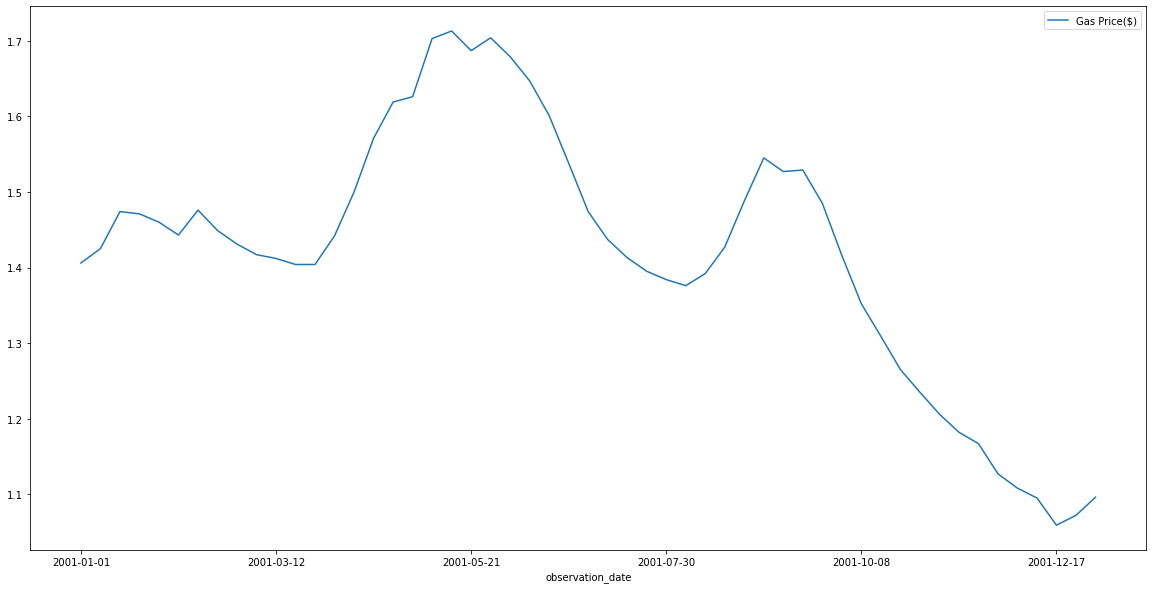

In [99]:
# Draw the line graph to see the trends 
first_data_df.plot.line(figsize=(20, 10))

In [101]:
# Average gas price in 2001 
first_data_df['Gas Price($)'].mean()

1.4200566037735851

In [109]:
# Gas price in September, 2001 
event_data = first_data.loc[first_data['Month'] ==9]
event_data.head()

,observation_date,Gas Price($),Year,Month,Day
87,2001-09-03,1.545,2001,9,3
88,2001-09-10,1.527,2001,9,10
89,2001-09-17,1.529,2001,9,17
90,2001-09-24,1.485,2001,9,24


Once we click the year, we see the trend like this above and create tooltip at the peak and show a relevant event.